In [2]:
print("Hello World")

Hello World


In [3]:
%pip --version

pip 24.2 from C:\Users\aniln\AppData\Roaming\Python\Python312\site-packages\pip (python 3.12)

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
import os
print("Current Dir ", os.getcwd())
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir, "datasets", "Train")
test_path = os.path.join(curr_dir, "datasets", "Test")
valid_path = os.path.join(curr_dir,"datasets","Valid")

Current Dir  c:\Users\aniln\Desktop\Potato_D


In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear",
)

Found 900 files belonging to 3 classes.


In [7]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [9]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,
        padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3,
        padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3,
        padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,
        kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,
        kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

C:\Users\aniln\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
training_history = cnn.fit(x=training_set, validation_data=validation_set,epochs=10)

Epoch 1/10


29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 754ms/step - accuracy: 0.4713 - loss: 1.0835 - val_accuracy: 0.7067 - val_loss: 0.6731
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 749ms/step - accuracy: 0.6703 - loss: 0.7124 - val_accuracy: 0.5667 - val_loss: 0.8878
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 819ms/step - accuracy: 0.7455 - loss: 0.5798 - val_accuracy: 0.8233 - val_loss: 0.3864
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 28s 964ms/step - accuracy: 0.8478 - loss: 0.3261 - val_accuracy: 0.8867 - val_loss: 0.2835
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 872ms/step - accuracy: 0.8974 - loss: 0.2520 - val_accuracy: 0.9367 - val_loss: 0.1691
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 868ms/step - accuracy: 0.9333 - loss: 0.1687 - val_accuracy: 0.9133 - val_loss: 0.2434
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 862ms/step - accuracy: 0.9196 - loss: 0.1939 - val_accuracy: 0.8833 - val_loss: 0.2764
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 876ms/step - accuracy: 0.9324 - loss: 0.1838 - val_accuracy: 0.943

In [13]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 297ms/step - accuracy: 0.9820 - loss: 0.0557
Training accuracy: 0.9833333492279053


In [14]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 262ms/step - accuracy: 0.9543 - loss: 0.1822
Validation accuracy: 0.949999988079071


In [15]:
cnn.save('trained_plant_disease_model.keras')

In [16]:
training_history.history

{'accuracy': [0.5199999809265137,
  0.6922222375869751,
  0.8022222518920898,
  0.847777783870697,
  0.903333306312561,
  0.9288889169692993,
  0.9322222471237183,
  0.9388889074325562,
  0.9433333277702332,
  0.9611111283302307],
 'loss': [0.9462623000144958,
  0.6712800860404968,
  0.4546378552913666,
  0.31653234362602234,
  0.23160956799983978,
  0.1981109231710434,
  0.17375092208385468,
  0.1646920144557953,
  0.14915116131305695,
  0.09820269048213959],
 'val_accuracy': [0.7066666483879089,
  0.5666666626930237,
  0.8233333230018616,
  0.8866666555404663,
  0.9366666674613953,
  0.9133333563804626,
  0.8833333253860474,
  0.9433333277702332,
  0.9133333563804626,
  0.949999988079071],
 'val_loss': [0.673080563545227,
  0.8878419995307922,
  0.38635167479515076,
  0.28349167108535767,
  0.1691213846206665,
  0.2433948963880539,
  0.27640774846076965,
  0.16279885172843933,
  0.27637311816215515,
  0.16460254788398743]}

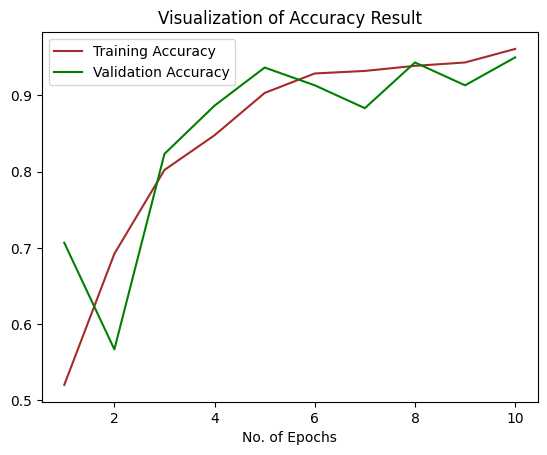

In [17]:
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['accuracy'],
         color='brown', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'],
         color='green', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()